In [459]:
import random
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# NBA players making it to the Hall of Fame

In [460]:
df = pd.read_csv("NBA Hall of Famers 2021.csv")
df

,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born
0,Kareem Abdul-Jabbar,C,19,1,218,102,1947
1,Kobe Bryant,G,18,1,198,96,1978
2,LeBron James,F,17,2,203,113,1984
3,Tim Duncan,F,15,1,211,113,1976
4,Kevin Garnett,F,15,1,211,108,1976
...,...,...,...,...,...,...,...
432,Julius Randle,F,1,2,206,113,1994
433,Pascal Siakam,F,1,2,206,104,1994
434,DeAndre Jordan,C,1,2,211,120,1988
435,Brook Lopez,C,1,2,213,124,1988


### Dummy variables for the position of each players

In [461]:
dummy_var_1 = pd.get_dummies(df['position'])
dummy_var_1.rename(columns = {'C': 'Center', 'F': 'Forward', 'G':'Guard'},inplace = True)
df = pd.concat([df, dummy_var_1], axis = 1)
dummy_var_1.head(5)

,Center,Forward,Guard
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


### Remove the column Name and position


In [462]:


df = df.drop(['position', 'Name'],1)
df

,All_star_selections,In_Hall_of_fame,height,weight,born,Center,Forward,Guard
0,19,1,218,102,1947,1,0,0
1,18,1,198,96,1978,0,0,1
2,17,2,203,113,1984,0,1,0
3,15,1,211,113,1976,0,1,0
4,15,1,211,108,1976,0,1,0
...,...,...,...,...,...,...,...,...
432,1,2,206,113,1994,0,1,0
433,1,2,206,104,1994,0,1,0
434,1,2,211,120,1988,1,0,0
435,1,2,213,124,1988,1,0,0


### Check how many players are currently playing

In [463]:
(df['In_Hall_of_fame'] == 2).sum()

64

In [464]:
current_player = df[df['In_Hall_of_fame'] == 2]
current_player

,All_star_selections,In_Hall_of_fame,height,weight,born,Center,Forward,Guard
2,17,2,203,113,1984,0,1,0
30,11,2,183,79,1985,0,0,1
31,11,2,206,108,1988,0,1,0
40,10,2,203,108,1984,0,1,0
46,9,2,190,90,1988,0,0,1
...,...,...,...,...,...,...,...,...
432,1,2,206,113,1994,0,1,0
433,1,2,206,104,1994,0,1,0
434,1,2,211,120,1988,1,0,0
435,1,2,213,124,1988,1,0,0


### remove the players from the dataset that are currently playing so that we can perform a train and test


In [465]:
retired_player = df[df['In_Hall_of_fame'] != 2 ]


(retired_player['In_Hall_of_fame'] == 0).sum()

244


group_names = ["1920s", "1930s", "1940s", "1950s",
                "1960s", "1970s", "1980s", "1990s", "2000s"]
group_names
bins = np.linspace(1919, 2009, 10)

retired_player['Decade'] = pd.cut(retired_player['born'], bins, labels=group_names, include_lowest=True)
retired_player.head(5)



plt.figure(figsize=(8, 5))
sns.boxplot(x='Decade', y='All_star_selections',
    data=retired_player, hue='In_Hall_of_fame', palette='rainbow')
plt.xlabel("Decade when an NBA player was born")
plt.ylabel("Number of All-star selections")
plt.title("Number of All-star selections, NBA HOF")
plt.show()
plt.close()

### Randomized the dataset and calculate index for split 

In [466]:
retired_player['In_Hall_of_fame'].value_counts(normalize = True)

data_randomized = retired_player.sample(frac = 1, random_state = 1)

training_test_index = round(len(data_randomized) * 0.8)

training_set = data_randomized[:training_test_index].reset_index(drop = True)
test_set = data_randomized[training_test_index:].reset_index(drop = True)

print(training_set.shape)
print(test_set.shape)

(298, 8)
(75, 8)


In [467]:
training_set

,All_star_selections,In_Hall_of_fame,height,weight,born,Center,Forward,Guard
0,7,1,206,102,1961,0,1,0
1,1,0,208,104,1967,0,1,0
2,1,0,206,99,1974,0,1,0
3,1,0,196,98,1944,0,1,0
4,6,1,203,95,1929,1,0,0
...,...,...,...,...,...,...,...,...
293,1,0,183,81,1967,0,0,1
294,3,1,198,86,1953,0,1,0
295,4,1,206,108,1974,0,1,0
296,1,0,206,99,1981,0,1,0


In [468]:
training_set['In_Hall_of_fame'].value_counts(normalize = True)

0    0.651007
1    0.348993
Name: In_Hall_of_fame, dtype: float64

In [469]:
test_set['In_Hall_of_fame'].value_counts(normalize = True)

0    0.666667
1    0.333333
Name: In_Hall_of_fame, dtype: float64

### trainX = all columns except "In_Hall_of_fame"
### trainY = "In_Hall_of_fame" column 

In [470]:
trainX = training_set.drop('In_Hall_of_fame',1)
trainY = training_set.iloc[ : , 1]
trainY

0      1
1      0
2      0
3      0
4      1
      ..
293    0
294    1
295    1
296    0
297    0
Name: In_Hall_of_fame, Length: 298, dtype: int64

In [471]:
testX = test_set.drop('In_Hall_of_fame', 1)
testY = test_set.iloc[:, 1]
testY

0     0
1     0
2     0
3     1
4     0
     ..
70    0
71    0
72    0
73    0
74    1
Name: In_Hall_of_fame, Length: 75, dtype: int64

In [472]:
trainX.head()

,All_star_selections,height,weight,born,Center,Forward,Guard
0,7,206,102,1961,0,1,0
1,1,208,104,1967,0,1,0
2,1,206,99,1974,0,1,0
3,1,196,98,1944,0,1,0
4,6,203,95,1929,1,0,0


In [473]:
testX.head()

,All_star_selections,height,weight,born,Center,Forward,Guard
0,6,196,95,1944,0,1,0
1,2,208,108,1958,1,0,0
2,1,213,120,1982,1,0,0
3,6,201,98,1934,0,1,0
4,2,206,83,1923,1,0,0


In [474]:
print(trainX.shape, trainY.shape)

(298, 7) (298,)


### perform Naive Baye's

In [518]:
clf = MultinomialNB()
# train
clf.fit(trainX, trainY)
# test
yhat = clf.predict(testX)

### Confusion Matrix

In [476]:
confM = confusion_matrix(testY, yhat)
pd.crosstab(testY, yhat)


col_0,0,1
In_Hall_of_fame,,
0,45,5
1,4,21


### Accuracy on Naive Baye's

In [477]:
print("Accuracy: ", accuracy_score(yhat, testY))

Accuracy:  0.88


### Accuracy on KNN

In [478]:
retired_player
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX,trainY)
predict_neigh = neigh.predict(testX)

y = accuracy_score(predict_neigh, testY)
print("Accuracy: ", y)

Accuracy:  0.7466666666666667


### Confusion Matrix Naive Bayes'

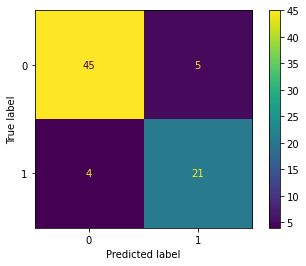

In [479]:
plot_confusion_matrix(clf, testX, testY)  
plt.show()

### Confusion Matrix for KNN

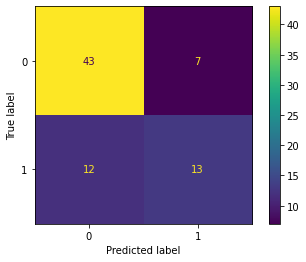

In [480]:
plot_confusion_matrix(neigh, testX, testY)  
plt.show()

### Random Forest

In [481]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(trainX, trainY)
rf_preds = rf_clf.predict(testX)
rf_acc = accuracy_score(rf_preds, testY)

print("Accuracy: ", rf_acc)

Accuracy:  0.8533333333333334


### Confusion Matrix for Random Forest Classifier

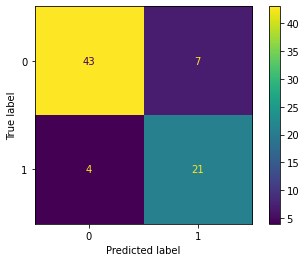

In [482]:
plot_confusion_matrix(rf_clf, testX, testY)
plt.show()

## Random Forest 5 Fold Cross Validation

In [515]:
Y = retired_player['In_Hall_of_fame']
train_data = retired_player.drop(['In_Hall_of_fame'], axis=1)
random.seed(123)
num_trees = [100, 500, 1000, 2000]
skf = StratifiedKFold(n_splits = 5, shuffle = True)
error = []
for param in num_trees:
    rf_mod = RandomForestClassifier(n_estimators=param)
    for train_index, test_index in skf.split(train_data, Y):
        trainX, testX = train_data.iloc[train_index],train_data.iloc[test_index]
        
        trainY, testY = Y.iloc[train_index],Y.iloc[test_index]
        rf_mod = rf_mod.fit(trainX, trainY)
        y_pred = rf_mod.predict(testX)
        error.append(accuracy_score(testY, y_pred))
        print("Accuracy:", sum(error)/len(error), "with", param, "tree")

Accuracy: 0.8133333333333334 with 100 tree
Accuracy: 0.8533333333333333 with 100 tree
Accuracy: 0.8577777777777778 with 100 tree
Accuracy: 0.8494144144144145 with 100 tree
Accuracy: 0.8633153153153155 with 100 tree
Accuracy: 0.8616516516516518 with 500 tree
Accuracy: 0.8661776061776063 with 500 tree
Accuracy: 0.8695720720720722 with 500 tree
Accuracy: 0.8570370370370372 with 500 tree
Accuracy: 0.861873873873874 with 500 tree
Accuracy: 0.8562489762489764 with 1000 tree
Accuracy: 0.854894894894895 with 1000 tree
Accuracy: 0.858877338877339 with 1000 tree
Accuracy: 0.8622007722007723 with 1000 tree
Accuracy: 0.8578738738738739 with 1000 tree
Accuracy: 0.8575900900900901 with 2000 tree
Accuracy: 0.8589083200847908 with 2000 tree
Accuracy: 0.8600800800800802 with 2000 tree
Accuracy: 0.8603319108582269 with 2000 tree
Accuracy: 0.8598828828828831 with 2000 tree


##  Gradient Boosting Classifier

In [516]:
random.seed(123)
boost_mod = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1,max_depth = 2)
skf = StratifiedKFold(n_splits = 5, shuffle = True)
error = []
for train_index, test_index in skf.split(train_data, Y):
    trainX, testX = train_data.iloc[train_index],train_data.iloc[test_index]
    trainY, testY = Y.iloc[train_index], Y.iloc[test_index]
    boost_mod = boost_mod.fit(trainX, trainY)
    y_pred = boost_mod.predict(testX)
    error.append(accuracy_score(testY,y_pred))
    print(sum(error)/len(error))
    


0.8
0.8666666666666667
0.8355555555555556
0.8361261261261261
0.804036036036036


### Additional information on if the current NBA players will make it to the Hall of Fame

In [485]:
realTestX = current_player.drop("In_Hall_of_fame", 1)
realTestX.head()


,All_star_selections,height,weight,born,Center,Forward,Guard
2,17,203,113,1984,0,1,0
30,11,183,79,1985,0,0,1
31,11,206,108,1988,0,1,0
40,10,203,108,1984,0,1,0
46,9,190,90,1988,0,0,1


In [486]:
realPred = pd.Series(clf.predict(realTestX))


In [487]:
ids = realTestX.index
ids

Int64Index([  2,  30,  31,  40,  46,  47,  59,  60,  80,  81,  82,  83, 104,
            105, 106, 133, 134, 135, 136, 137, 138, 139, 177, 178, 179, 180,
            181, 182, 214, 215, 216, 217, 218, 219, 288, 289, 290, 291, 292,
            293, 294, 295, 296, 297, 298, 299, 419, 420, 421, 422, 423, 424,
            425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436],
           dtype='int64')

In [488]:
KNNrealPred = pd.Series(neigh.predict(realTestX))


In [489]:
RFrealPred = pd.Series(rf_clf.predict(realTestX))

In [490]:
KNNrealPred

0     1
1     0
2     0
3     1
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [491]:
RFrealPred.sum()

5

In [492]:
del df

In [493]:
df = pd.read_csv("NBA Hall of Famers 2021.csv")
df

,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born
0,Kareem Abdul-Jabbar,C,19,1,218,102,1947
1,Kobe Bryant,G,18,1,198,96,1978
2,LeBron James,F,17,2,203,113,1984
3,Tim Duncan,F,15,1,211,113,1976
4,Kevin Garnett,F,15,1,211,108,1976
...,...,...,...,...,...,...,...
432,Julius Randle,F,1,2,206,113,1994
433,Pascal Siakam,F,1,2,206,104,1994
434,DeAndre Jordan,C,1,2,211,120,1988
435,Brook Lopez,C,1,2,213,124,1988


In [494]:
df.iloc[2, :]

Name                   LeBron James
position                          F
All_star_selections              17
In_Hall_of_fame                   2
height                          203
weight                          113
born                           1984
Name: 2, dtype: object

In [495]:
curr_pls = df.iloc[ids, :]
curr_pls.shape

(64, 7)

In [496]:
realPred.shape

(64,)

In [497]:
realPred


0     1
1     1
2     1
3     1
4     1
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [498]:
curr_pls

,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born
2,LeBron James,F,17,2,203,113,1984
30,Chris Paul,G,11,2,183,79,1985
31,Kevin Durant,F,11,2,206,108,1988
40,Carmelo Anthony,F,10,2,203,108,1984
46,Russell Westbrook,G,9,2,190,90,1988
...,...,...,...,...,...,...,...
432,Julius Randle,F,1,2,206,113,1994
433,Pascal Siakam,F,1,2,206,104,1994
434,DeAndre Jordan,C,1,2,211,120,1988
435,Brook Lopez,C,1,2,213,124,1988


In [499]:
curr_pls = curr_pls.reset_index()
curr_pls

,index,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born
0,2,LeBron James,F,17,2,203,113,1984
1,30,Chris Paul,G,11,2,183,79,1985
2,31,Kevin Durant,F,11,2,206,108,1988
3,40,Carmelo Anthony,F,10,2,203,108,1984
4,46,Russell Westbrook,G,9,2,190,90,1988
...,...,...,...,...,...,...,...,...
59,432,Julius Randle,F,1,2,206,113,1994
60,433,Pascal Siakam,F,1,2,206,104,1994
61,434,DeAndre Jordan,C,1,2,211,120,1988
62,435,Brook Lopez,C,1,2,213,124,1988


### Current players who will or will not make it to the Hall of Fame

In [500]:
NBcurr_pls = pd.concat([curr_pls, realPred], 1)
NBcurr_pls = NBcurr_pls.dropna(axis=0)
NBcurr_pls.rename(columns={0:"pred_HOF"}, inplace=True)
print(NBcurr_pls.to_string())

    index                   Name position  All_star_selections  In_Hall_of_fame  height  weight  born  pred_HOF
0       2           LeBron James        F                   17                2     203     113  1984         1
1      30             Chris Paul        G                   11                2     183      79  1985         1
2      31           Kevin Durant        F                   11                2     206     108  1988         1
3      40        Carmelo Anthony        F                   10                2     203     108  1984         1
4      46      Russell Westbrook        G                    9                2     190      90  1988         1
5      47           James Harden        G                    9                2     196      99  1989         1
6      59          Anthony Davis        F                    8                2     206      97  1968         1
7      60          Dwight Howard        C                    8                2     211     120  1985   

In [517]:
NBcurr_pls['pred_HOF'].value_counts(dropna = False)

0    41
1    23
Name: pred_HOF, dtype: int64

In [502]:
KNNcurr_pls = pd.concat([curr_pls, KNNrealPred], 1)
KNNcurr_pls = KNNcurr_pls.dropna(axis=0)
KNNcurr_pls
KNNcurr_pls.rename(columns={0:"pred_HOF"}, inplace=True)
print(KNNcurr_pls.to_string())

    index                   Name position  All_star_selections  In_Hall_of_fame  height  weight  born  pred_HOF
0       2           LeBron James        F                   17                2     203     113  1984         1
1      30             Chris Paul        G                   11                2     183      79  1985         0
2      31           Kevin Durant        F                   11                2     206     108  1988         0
3      40        Carmelo Anthony        F                   10                2     203     108  1984         1
4      46      Russell Westbrook        G                    9                2     190      90  1988         0
5      47           James Harden        G                    9                2     196      99  1989         0
6      59          Anthony Davis        F                    8                2     206      97  1968         1
7      60          Dwight Howard        C                    8                2     211     120  1985   

In [503]:
KNNcurr_pls['pred_HOF'].value_counts(dropna = False)

0    60
1     4
Name: pred_HOF, dtype: int64

In [504]:
RFcurr_pls = pd.concat([curr_pls, RFrealPred], 1)
RFcurr_pls = RFcurr_pls.dropna(axis=0)
RFcurr_pls
RFcurr_pls.rename(columns={0:"pred_HOF"}, inplace=True)
print(RFcurr_pls.to_string())

    index                   Name position  All_star_selections  In_Hall_of_fame  height  weight  born  pred_HOF
0       2           LeBron James        F                   17                2     203     113  1984         1
1      30             Chris Paul        G                   11                2     183      79  1985         0
2      31           Kevin Durant        F                   11                2     206     108  1988         1
3      40        Carmelo Anthony        F                   10                2     203     108  1984         1
4      46      Russell Westbrook        G                    9                2     190      90  1988         0
5      47           James Harden        G                    9                2     196      99  1989         0
6      59          Anthony Davis        F                    8                2     206      97  1968         1
7      60          Dwight Howard        C                    8                2     211     120  1985   

In [505]:
RFcurr_pls['pred_HOF'].value_counts(dropna = False)

0    59
1     5
Name: pred_HOF, dtype: int64

<ipython-input-458-598cbe711bcf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retired_player['Decade'] = pd.cut(retired_player['born'], bins, labels=group_names, include_lowest=True)


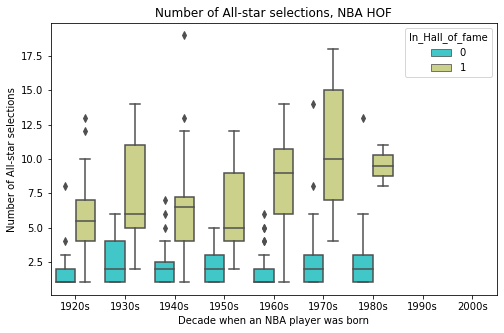

In [458]:

group_names = ["1920s", "1930s", "1940s", "1950s",
                "1960s", "1970s", "1980s", "1990s", "2000s"]
group_names
bins = np.linspace(1919, 2009, 10)

retired_player['Decade'] = pd.cut(retired_player['born'], bins, labels=group_names, include_lowest=True)
retired_player.head(5)



plt.figure(figsize=(8, 5))
sns.boxplot(x='Decade', y='All_star_selections',
    data=retired_player, hue='In_Hall_of_fame', palette='rainbow')
plt.xlabel("Decade when an NBA player was born")
plt.ylabel("Number of All-star selections")
plt.title("Number of All-star selections, NBA HOF")
plt.show()
plt.close()